In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

from HighResQHD import HighResQHD


/Users/jiaqileng/Project/q-PDHG/.venv/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/jiaqileng/Project/q-PDHG/.venv/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


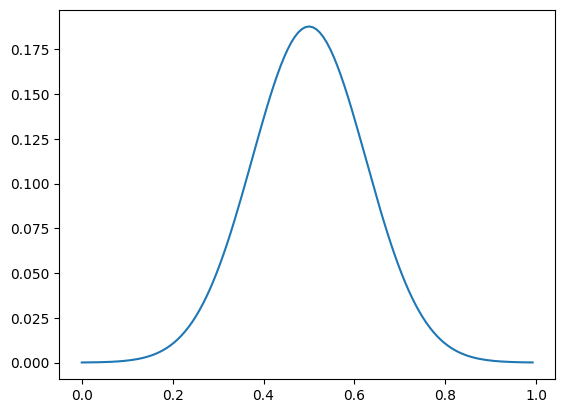

In [4]:
f = lambda x: (4 * x - 2)**4 - (4 * x - 2 - 1/8)**2
grad = lambda x: 16 * (4 * x - 2)**3 - 8 * (4 * x - 2 - 1/8)
init_state = lambda x: np.exp(-32 * (x-0.5)**2)

lb = 0
rb = 1
s = 0.1
beta = 0.1 * np.sqrt(s)
N = 128

model = HighResQHD(f, grad, init_state, lb, rb, s, beta, N)
psi0 = model.construct_init_state(model.x_data, model.init_state)
plt.plot(model.x_data, psi0)

In [10]:
# expm 
T0 = 1.5 * np.sqrt(s)
print(T0)
T1 = 5
n_steps = 10000

snapshot_times, probability_low = model.run_qhd(T1, n_steps)
snapshot_times, probability_high = model.simulator(T1, n_steps)

0.4743416490252569


0.8829085593382002
0.9221498611377176


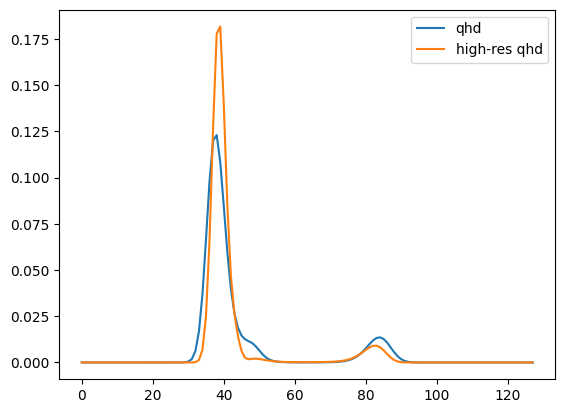

In [11]:
plt.plot(probability_low[-1], label='qhd')
plt.plot(probability_high[-1], label='high-res qhd')
plt.legend()

indicator = model.x_data < 0.5

print(probability_low[-1] @ indicator)
print(probability_high[-1] @ indicator)

## Question 1: Convex optimization -- stepsize

We study how the step size $s$ affect the convergence behavior in convex optimization problems

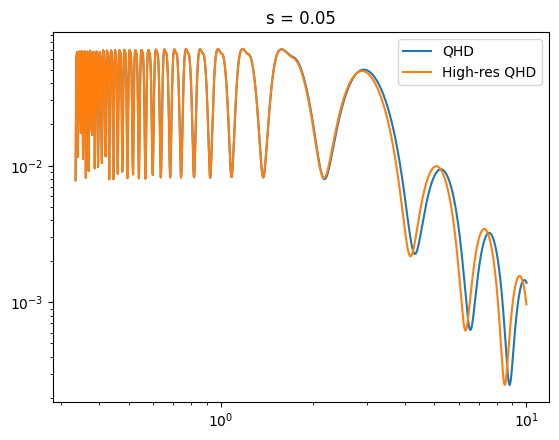

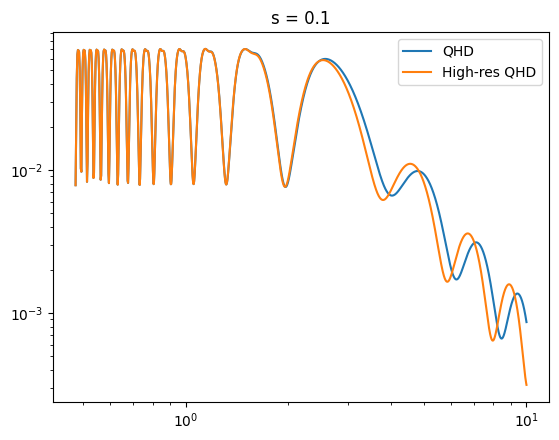

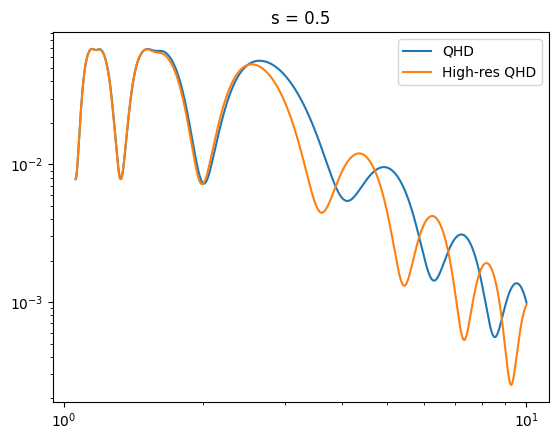

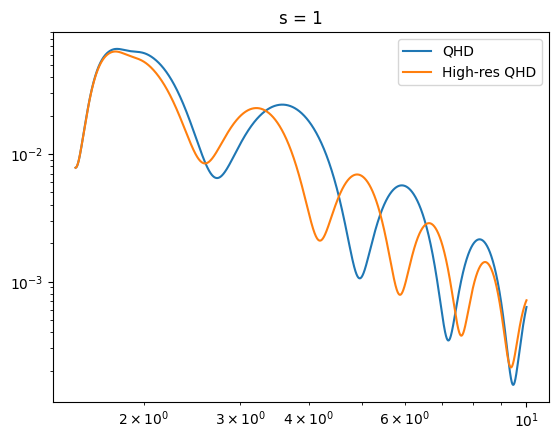

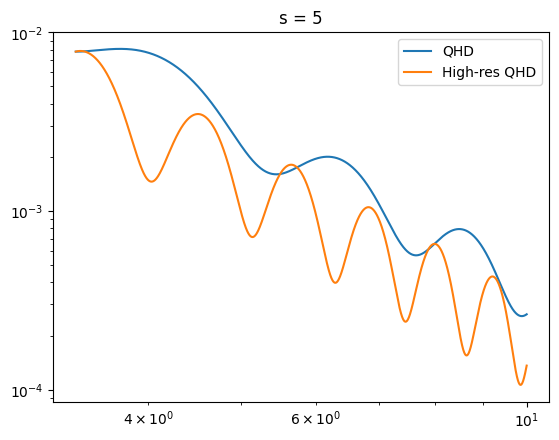

In [20]:
f = lambda x: (x - 0.5)**2
grad = lambda x: 2 * (x - 0.5)
init_state = lambda x: np.exp(-32*(x-0.5)**2)

lb = 0
rb = 1
N = 128
tf = 10
n_steps = 5000
Stepsize = [0.05, 0.1, 0.5, 1, 5]

for s in Stepsize:
    beta = 0.1 * np.sqrt(s)
    t0 = 1.5 * np.sqrt(s)
    model = HighResQHD(f, grad, init_state, lb, rb, s, beta, N)
    snapshot_times, probability_qhd = model.run_qhd(t0, tf, n_steps)
    _, probability_highres_qhd = model.simulator(t0, tf, n_steps)

    # plot
    obs = f(model.x_data)
    val_qhd = [obs @ probability_qhd[i] for i in range(n_steps)]
    val_highres_qhd = [obs @ probability_highres_qhd[i] for i in range(n_steps)]
    plt.loglog(snapshot_times, val_qhd, label='QHD')
    plt.loglog(snapshot_times, val_highres_qhd, label='High-res QHD')
    plt.title(f"s = {s}")
    plt.legend()
    plt.show()
    

Observations: 

1. High-resolution QHD works for very large stepsizes. For example, when $s=5$, the high-res QHD has faster convergence. 
2. However, it is not always the case that larger $s$ is better. When $s=1$, QHD seems to have better convergence than high-resolution QHD.

## Question 2: Convex optimization -- $\beta$

Now, we fix $s = 0.5$ and test different choice of $\beta$ values. 

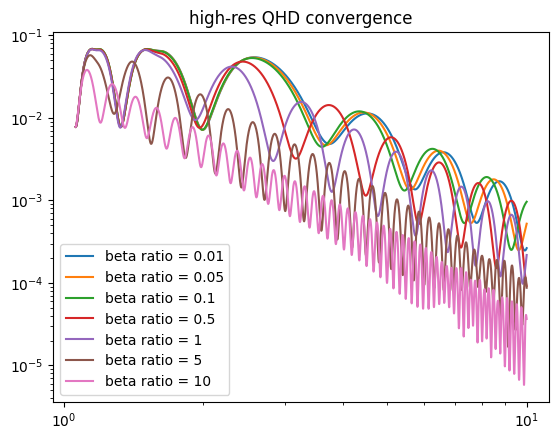

In [23]:
f = lambda x: (x - 0.5)**2
grad = lambda x: 2 * (x - 0.5)
init_state = lambda x: np.exp(-32*(x-0.5)**2)

lb = 0
rb = 1
N = 128
tf = 10
n_steps = 5000
s = 0.5
Beta_ratio = [0.01, 0.05, 0.1, 0.5, 1, 5, 10]

for ratio in Beta_ratio:
    beta = ratio * np.sqrt(s)
    t0 = 1.5 * np.sqrt(s)
    model = HighResQHD(f, grad, init_state, lb, rb, s, beta, N)
    snapshot_times, probability_qhd = model.run_qhd(t0, tf, n_steps)
    _, probability_highres_qhd = model.simulator(t0, tf, n_steps)

    # plot
    obs = f(model.x_data)
    val_highres_qhd = [obs @ probability_highres_qhd[i] for i in range(n_steps)]
    plt.loglog(snapshot_times, val_highres_qhd, label=f'beta ratio = {ratio}')

plt.legend()
plt.title("high-res QHD convergence")
plt.show()
    

## Question 3: Nonconvex optimization -- stepsize

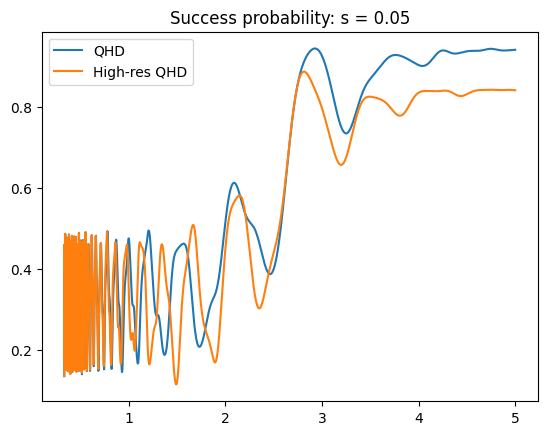

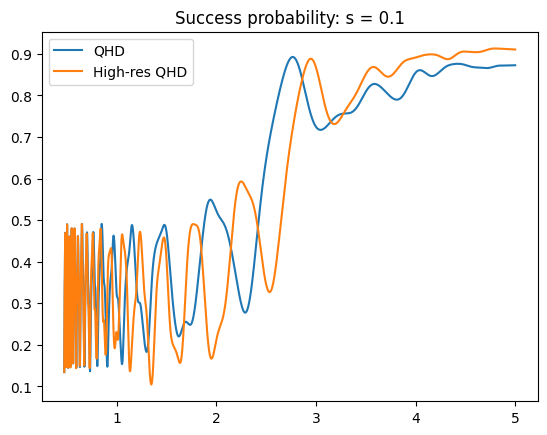

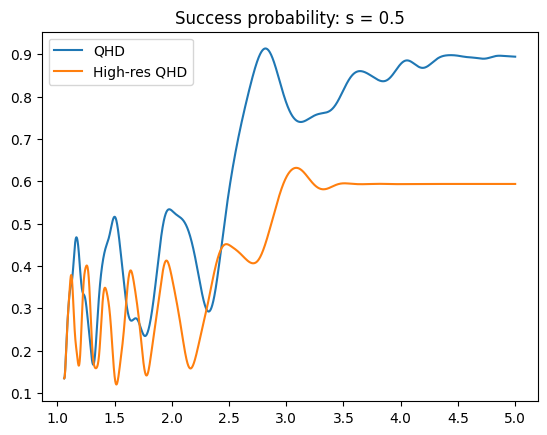

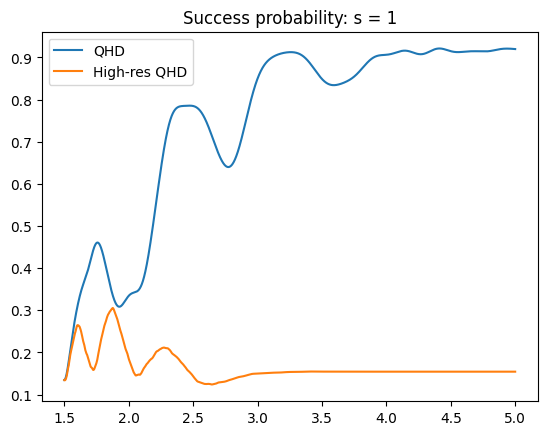

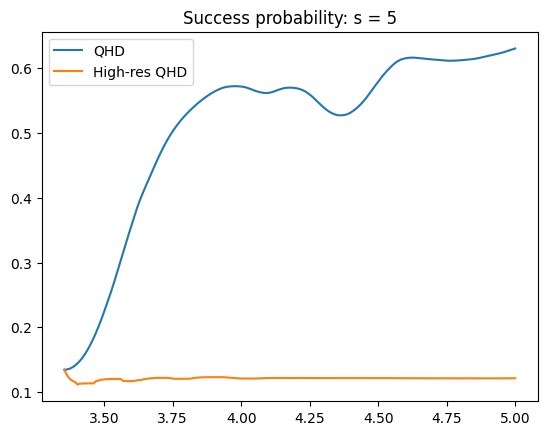

In [25]:
f = lambda x: (4 * x - 2)**4 - (4 * x - 2 - 1/8)**2
grad = lambda x: 16 * (4 * x - 2)**3 - 8 * (4 * x - 2 - 1/8)
init_state = lambda x: np.exp(-32*(x-0.5)**2)

lb = 0
rb = 1
N = 128
tf = 5
n_steps = 5000
Stepsize = [0.05, 0.1, 0.5, 1, 5]

for s in Stepsize:
    beta = 0.1 * np.sqrt(s)
    t0 = 1.5 * np.sqrt(s)
    model = HighResQHD(f, grad, init_state, lb, rb, s, beta, N)
    snapshot_times, probability_qhd = model.run_qhd(t0, tf, n_steps)
    _, probability_highres_qhd = model.simulator(t0, tf, n_steps)

    # plot
    indicator = model.x_data < 0.4
    success_prob_qhd = [indicator @ probability_qhd[i] for i in range(n_steps)]
    success_prob_highres_qhd = [indicator @ probability_highres_qhd[i] for i in range(n_steps)]
    plt.plot(snapshot_times, success_prob_qhd, label='QHD')
    plt.plot(snapshot_times, success_prob_highres_qhd, label='High-res QHD')
    plt.title(f"Success probability: s = {s}")
    plt.legend()
    plt.show()

## Question 4: Nonconvex optimization -- $\beta$

(-1.0, 2.0)

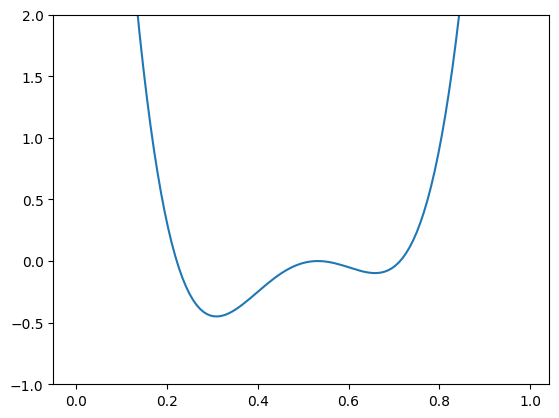

In [38]:
plt.plot(model.x_data, f(model.x_data))
plt.ylim([-1,2])

ratio = 0.01 completed.
ratio = 0.02 completed.
ratio = 0.05 completed.
ratio = 0.1 completed.
ratio = 0.2 completed.
ratio = 0.5 completed.
ratio = 1 completed.


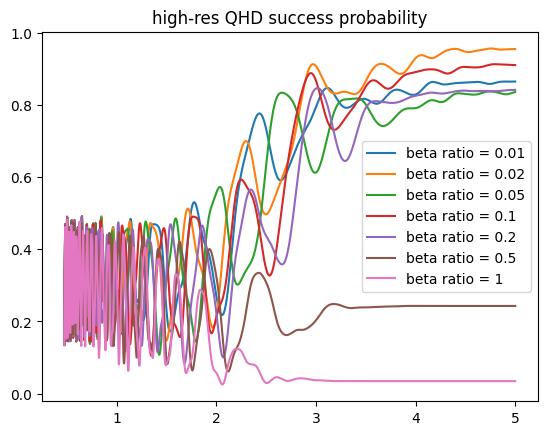

In [27]:
f = lambda x: (4 * x - 2)**4 - (4 * x - 2 - 1/8)**2
grad = lambda x: 16 * (4 * x - 2)**3 - 8 * (4 * x - 2 - 1/8)
init_state = lambda x: np.exp(-32*(x-0.5)**2)

lb = 0
rb = 1
N = 128
tf = 5
n_steps = 5000
s = 0.1
Beta_ratio = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]

for ratio in Beta_ratio:
    beta = ratio * np.sqrt(s)
    t0 = 1.5 * np.sqrt(s)
    model = HighResQHD(f, grad, init_state, lb, rb, s, beta, N)
    # snapshot_times, probability_qhd = model.run_qhd(t0, tf, n_steps)
    snapshot_times, probability_highres_qhd = model.simulator(t0, tf, n_steps)

    # plot
    indicator = model.x_data < 0.4
    success_prob_highres_qhd = [indicator @ probability_highres_qhd[i] for i in range(n_steps)]
    plt.plot(snapshot_times, success_prob_highres_qhd, label=f'beta ratio = {ratio}')

    print(f"ratio = {ratio} completed.")

plt.legend()
plt.title("high-res QHD success probability")
plt.show()

## Question 5: spectral gap of the Hamiltonian operator

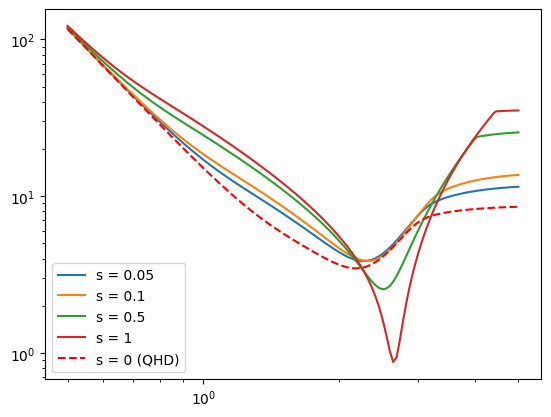

In [2]:
f = lambda x: (4 * x - 2)**4 - (4 * x - 2 - 1/8)**2
grad = lambda x: 16 * (4 * x - 2)**3 - 8 * (4 * x - 2 - 1/8)
init_state = lambda x: np.exp(-32*(x-0.5)**2)

lb = 0
rb = 1
N = 128
t0 = 0.5
tf = 5
n_steps = 100
Stepsize = [0.05, 0.1, 0.5, 1]


for s in Stepsize: 
    beta = 0.1 * np.sqrt(s)
    model = HighResQHD(f, grad, init_state, lb, rb, s, beta, N)
    snapshot_times, spectral_gap = model.compute_spectral_gap_highres_qhd(t0, tf, n_steps)
    plt.loglog(snapshot_times, spectral_gap, label=f's = {s}')


snapshot_times, spectral_gap = model.compute_spectral_gap_qhd(t0, tf, n_steps)
plt.loglog(snapshot_times, spectral_gap, 'r--', label='s = 0 (QHD)')
plt.legend()

In [33]:
Stepsize = np.linspace(0.01, 1, 100)
min_spec_gap_beta_1 = []
min_spec_gap_beta_2 = []
min_spec_gap_beta_3 = []

for s in Stepsize: 
    beta = 0.01 * np.sqrt(s)
    model = HighResQHD(f, grad, init_state, lb, rb, s, beta, N)
    _, spectral_gap = model.compute_spectral_gap_highres_qhd(t0, tf, n_steps)
    min_spec_gap_beta_1.append(np.min(spectral_gap))

    beta = 0.05 * np.sqrt(s)
    model = HighResQHD(f, grad, init_state, lb, rb, s, beta, N)
    _, spectral_gap = model.compute_spectral_gap_highres_qhd(t0, tf, n_steps)
    min_spec_gap_beta_2.append(np.min(spectral_gap))

    beta = 0.1 * np.sqrt(s)
    model = HighResQHD(f, grad, init_state, lb, rb, s, beta, N)
    _, spectral_gap = model.compute_spectral_gap_highres_qhd(t0, tf, n_steps)
    min_spec_gap_beta_3.append(np.min(spectral_gap))

In [16]:
# baseline: QHD spectral gap 
_, spectral_gap = model.compute_spectral_gap_qhd(t0, tf, n_steps)
qhd_min_gap = np.min(spectral_gap)

Text(0.5, 1.0, 'spectral gap of High-res QHD operator')

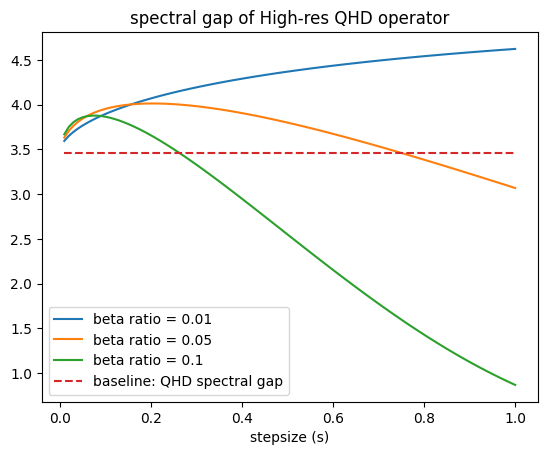

In [35]:
plt.plot(Stepsize, min_spec_gap_beta_1, label='beta ratio = 0.01')
plt.plot(Stepsize, min_spec_gap_beta_2, label='beta ratio = 0.05')
plt.plot(Stepsize, min_spec_gap_beta_3, label='beta ratio = 0.1')
plt.plot(Stepsize, qhd_min_gap * np.ones_like(Stepsize), '--', label='baseline: QHD spectral gap')
plt.legend()
plt.xlabel('stepsize (s)')
plt.title('spectral gap of High-res QHD operator')

Based on the spectral gap plot, we now verify if the performance of high-resolution QHD is determined by the gap.

We consider two parameter combinations: 
1. $s = 0.1$, $\beta = 0.1 \times \sqrt{s}$
2. $s = 0.5$, $\beta = 0.01 \times \sqrt{s}$

In [ ]:
f = lambda x: (4 * x - 2)**4 - (4 * x - 2 - 1/8)**2
grad = lambda x: 16 * (4 * x - 2)**3 - 8 * (4 * x - 2 - 1/8)
init_state = lambda x: np.exp(-32*(x-0.5)**2)

lb = 0
rb = 1
N = 128
tf = 5

# setup 1: s = 0.1, beta_ratio = 0.1
model_setup_1 = HighResQHD(f, grad, init_state, lb, rb, s=0.1, beta=0.1*np.sqrt(0.1), N=N)

# setup 2: s = 0.5, beta_ratio = 0.01
model_setup_2 = HighResQHD(f, grad, init_state, lb, rb, s=0.5, beta=0.01*np.sqrt(0.5), N=N)

Text(0.5, 0, 'time (t)')

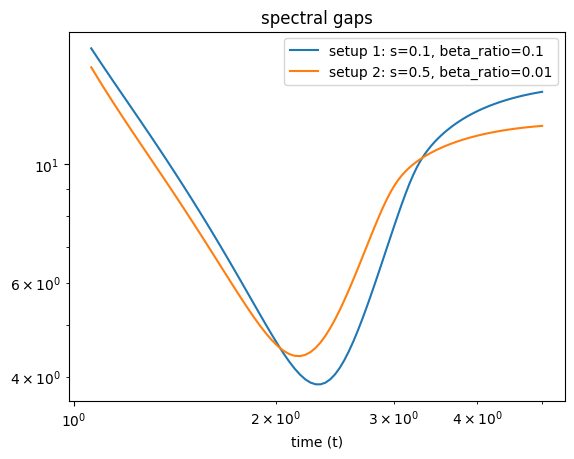

In [27]:
n_steps = 100
snapshot_times, spectral_gap_setup_1 = model_setup_1.compute_spectral_gap_highres_qhd(t0, tf, n_steps)
_, spectral_gap_setup_2 = model_setup_2.compute_spectral_gap_highres_qhd(t0, tf, n_steps)

plt.loglog(snapshot_times, spectral_gap_setup_1, label='setup 1: s=0.1, beta_ratio=0.1')
plt.loglog(snapshot_times, spectral_gap_setup_2, label='setup 2: s=0.5, beta_ratio=0.01')
plt.legend()
plt.title('spectral gaps')
plt.xlabel('time (t)')

In [31]:
# simulation high-res QHD
n_steps = 5000

# setup 1
t0 = 1.5 * np.sqrt(0.1)
snapshot_times_1, probability_setup_1 = model_setup_1.simulator(t0, tf, n_steps)

# setup 2
t0 = 1.5 * np.sqrt(0.5)
snapshot_times_2, probability_setup_2 = model_setup_2.simulator(t0, tf, n_steps)

# baseline: s = 0 (QHD)
snapshot_times_baseline, probability_baseline = model_setup_1.run_qhd(0.25, tf, n_steps)


(0.0, 1.0)

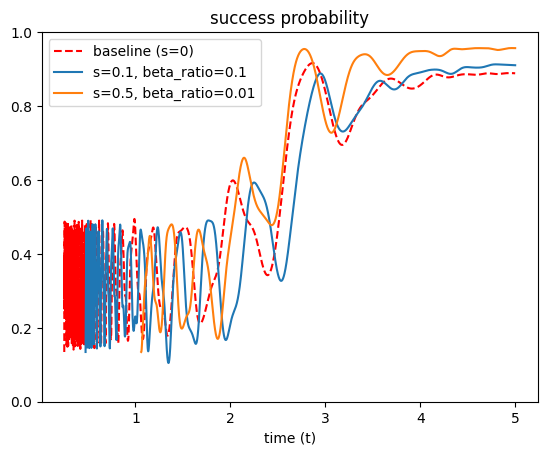

In [40]:
indicator = model_setup_1.x_data < 0.4
success_prob_baseline = [indicator @ probability_baseline[i] for i in range(n_steps)]
success_prob_setup_1 = [indicator @ probability_setup_1[i] for i in range(n_steps)]
success_prob_setup_2 = [indicator @ probability_setup_2[i] for i in range(n_steps)]

plt.plot(snapshot_times_baseline, success_prob_baseline, 'r--', label='baseline (s=0)')
plt.plot(snapshot_times_1, success_prob_setup_1, label='s=0.1, beta_ratio=0.1')
plt.plot(snapshot_times_2, success_prob_setup_2, label='s=0.5, beta_ratio=0.01')
plt.legend()
plt.title('success probability')
plt.xlabel('time (t)')
plt.ylim([0, 1])